In [1]:
from torchvision import datasets
from torchvision.tranforms import ToTensor


ModuleNotFoundError: No module named 'torchvision.tranforms'

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
#data_train
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
#test_data
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18393833.78it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 488566.61it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4489931.84it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5039822.43it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

NameError: name 'torch' is not defined

In [2]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [6]:
from torch.utils.data import DataLoader

loader = {
    'train': DataLoader(train_data, batch_size = 100, shuffle = True, num_workers=1),
    'test': DataLoader(test_data, batch_size = 100, shuffle = True, num_workers = 1)
}

In [7]:
loader

{'train': <torch.utils.data.dataloader.DataLoader at 0x7cd68879f4c0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7cd68879ed10>}

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [20]:
print(type(CNN))

<class 'type'>


In [24]:
#định nghĩa model CNN
class CNN(nn.Module) :
  def __init__(self) :
    super().__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2 ))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training = self.training)
    x = self.fc2(x)
    return F.softmax(x)

In [25]:
print(isinstance(CNN, type))  # Should print True
model = CNN().to(device)

True


In [26]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_index, (data, target) in enumerate(loader['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_index % 25 == 0:
      print(f'Train Epoch: {epoch} [{batch_index * len(data)}/{len(loader["train"].dataset)} ({100. * batch_index / len(loader["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in loader['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.data.max(1, keepdim = True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(loader['test'].dataset)
    print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loader["test"].dataset)} ({100. * correct / len(loader["test"].dataset):.0f}%)\n')

In [27]:
for epoch in range(1, 10):
  train(epoch)
  test()


<ipython-input-24-77188f16b16c>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303987
Train Epoch: 1 [2500/60000 (4%)]	Loss: 2.287505
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.144826
Train Epoch: 1 [7500/60000 (12%)]	Loss: 1.908900
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.917684
Train Epoch: 1 [12500/60000 (21%)]	Loss: 1.786554
Train Epoch: 1 [15000/60000 (25%)]	Loss: 1.765240
Train Epoch: 1 [17500/60000 (29%)]	Loss: 1.804622
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.717485
Train Epoch: 1 [22500/60000 (38%)]	Loss: 1.753507
Train Epoch: 1 [25000/60000 (42%)]	Loss: 1.683703
Train Epoch: 1 [27500/60000 (46%)]	Loss: 1.796128
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.713228
Train Epoch: 1 [32500/60000 (54%)]	Loss: 1.703750
Train Epoch: 1 [35000/60000 (58%)]	Loss: 1.604105
Train Epoch: 1 [37500/60000 (62%)]	Loss: 1.786479
Train Epoch: 1 [40000/60000 (67%)]	Loss: 1.708931
Train Epoch: 1 [42500/60000 (71%)]	Loss: 1.688117
Train Epoch: 1 [45000/60000 (75%)]	Loss: 1.672920
Train Epoch: 1 [47500/60000 (79%)]	Loss: 1.734883
Train Epoc

Prediction: 1, Actual: 1


<ipython-input-24-77188f16b16c>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


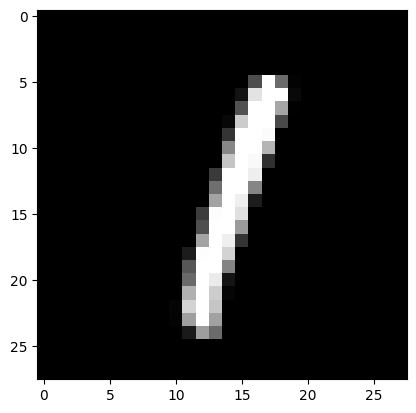

In [44]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

model.eval()
data, target = test_data[5]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim = 1, keepdim = True)
print(f'Prediction: {prediction.item()}, Actual: {target}')


image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap = 'gray')
plt.show()